# 回転相関


In [1]:
import gromacs

with open("testcase/MethaneAR333-0.gro") as f:
    frames = [frame for frame in gromacs.read_gro(f)]

# 炭素と水素1の座標を抽出しておく。
C = [frame["position"][::5] for frame in frames]
H1 = [frame["position"][1::5] for frame in frames]

unwrapされているはずなので、単純に座標を引き算すると変位が得られる。

In [20]:
import numpy as np

dots = dict()

# the last frame
for i in range(len(frames)):
    # 1フレーム分のCHベクトルをまとめて計算
    CHa = H1[i] - C[i]
    # 規格化
    CHa /= np.linalg.norm(CHa, axis=1)[:,np.newaxis]
    # the first frame
    for j in range(i+1):
        CHb = H1[j] - C[j]
        CHb /= np.linalg.norm(CHb, axis=1)[:,np.newaxis]
        
        # まとめて内積
        dot = np.sum(CHa * CHb, axis=1)

        # time difference in steps
        dt = i-j

        if dt > 50:
            continue
        
        if dt not in dots:
            dots[dt] = []
        # store
        dots[dt] += list(dot)
        
# Rotational Correlation of CH vectors
RC = [np.mean(dots[dt]) for dt in sorted(dots)]
    

6


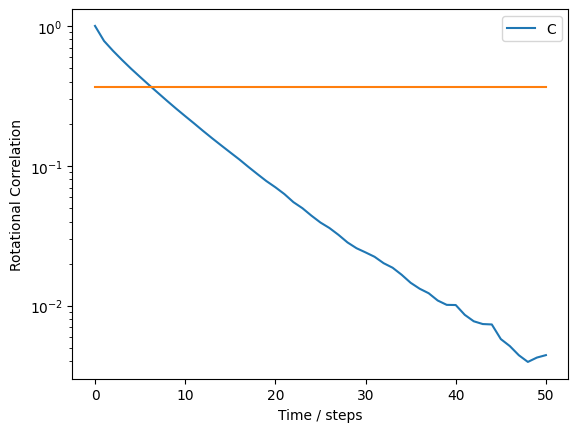

In [23]:
import matplotlib.pyplot as plt

plt.plot(RC, label="C")
plt.xlabel("Time / steps")
plt.ylabel(r"Rotational Correlation")
plt.yscale("log")
X = np.linspace(0,50,10)
Y = np.ones(10) * np.exp(-1)
plt.plot(X,Y)
plt.legend()

print(np.argmin(np.abs(RC-np.exp(-1))))


1ステップは0.5 psなので、回転の時定数は3 ps。意外にくるくる。ただし、配向分布からわかるように、均等ではない。ラチェット的な回転。

いや、でもラチェット的に回転するなら、回転相関にはその振動が反映されるはずだ。

スムーズに回転できるとすれば、Methane A構造のような複雑な結晶構造になる理由がわからない。